# Assignment 6: Nearest Neighbour and Artificial Neural Networks

## Objective of this assignment
The objective of this exercise is to understand how k-nearest neighbor and neural networks can be used to solve classification problems.

## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: come to the practical sessions or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 5.2-5.4.


## Additional Tools
For this exercise you will need to load the provided *MLPPlot.py* script.

This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute, http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.


##  6.1 K-nearest neighbor classification
In this exercise we will use the k-nearest neighbors (KNN) method for classification.
First, we will consider the four synthetic data sets synth1, synth2, synth3 and
synth4 we used in earlier assignments.

#### 6.1.1 (2 points)
For each of the four synthetic data sets, do the following. Load the complete dataset `X` and examine it by making a scatter plot, coloring the points by their class in `y`. Don't forget to add a legend. Classify the data `X` using the k-nearest neighbor classifier `KNeighborsClassifier` from `sklearn.neighbors` (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Choose a suitable distance measure (you should consider the distance measures `euclidean` and `cityblock`). Choose a suitable number of neighbors. Make another scatterplot of the new classification (with the best k-value and distance measures you found -- just one plot per data set is fine). Create the confusion matrix, plot it using the function given below, and calculate the accuracy and error rate from these numbers.

*Hints: To generate a confusion matrix, you can use the function confusion_matrix() from the module sklearn.metrics. You can use the function below to plot the confusion matrix. Don't remember how to read a confusion matrix? Check the wiki page: https://en.wikipedia.org/wiki/Confusion_matrix*

Which distance measures worked best for each of the four problems? Can you explain why? How many neighbors were needed for the four problems? Can you give
an example of when it would be good to use a large/small number of neighbors?
Consider e.g. when clusters are well separated versus when they are overlapping.


In [1]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from Toolbox.clusterPlot import clusterPlot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm,y):
    "Plots confusion matrix cm using label vector y" 
    df_cm = pd.DataFrame(cm, index = [i+1 for i in np.unique(y)],
                  columns = [i+1 for i in np.unique(y)])
    plt.figure()
    sn.heatmap(df_cm, annot=True)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    plt.show()

SYNTH1


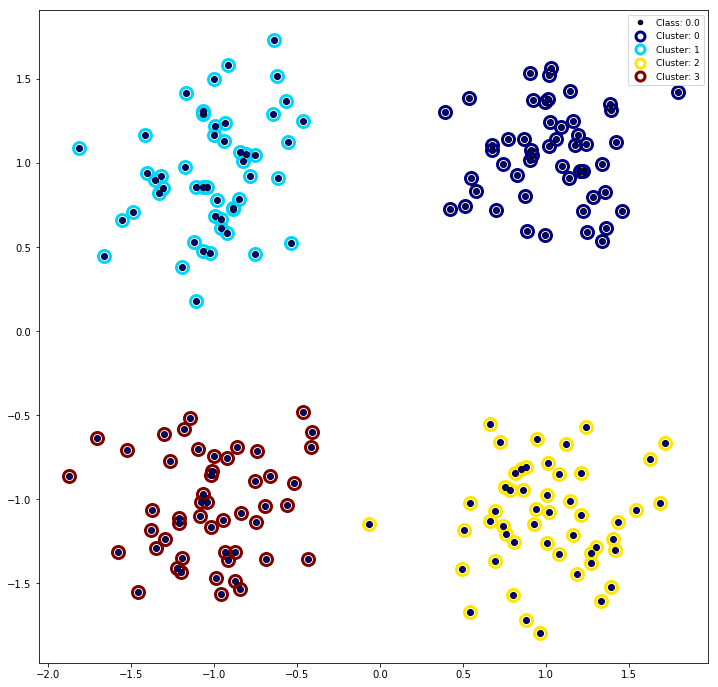

SYNTH2


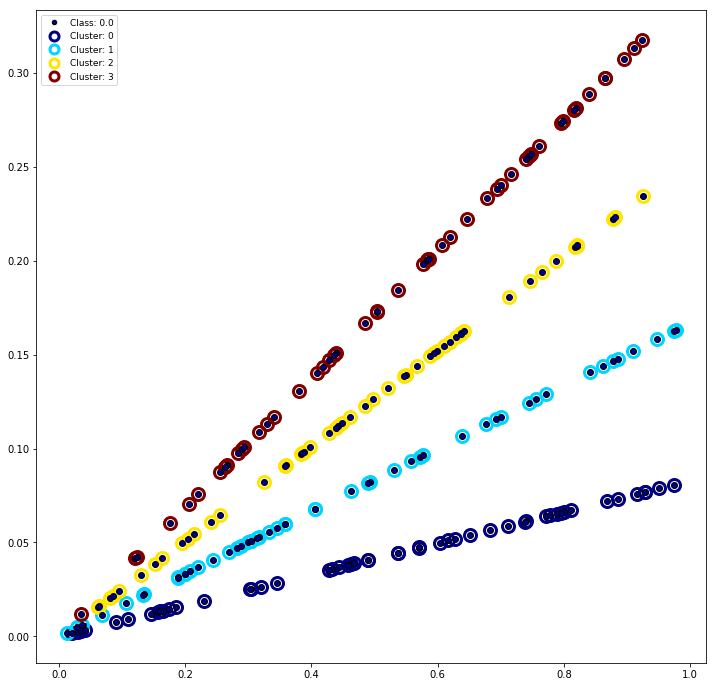

SYNTH3


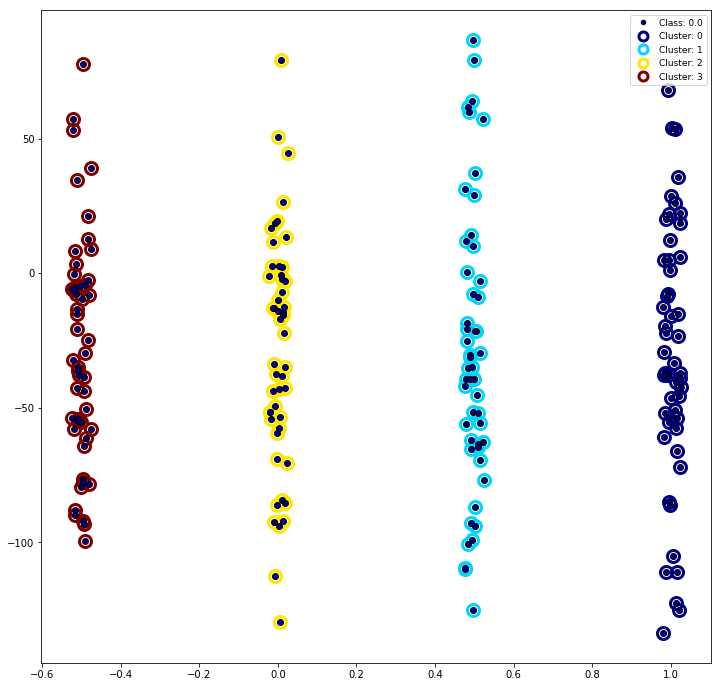

SYNTH4


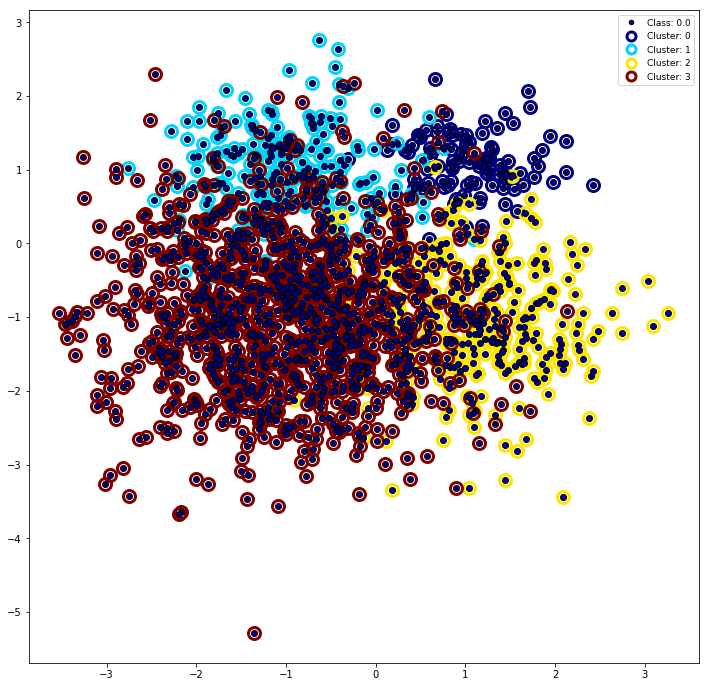

In [2]:
synth=[[] for i in range(4)]

synth[0]=scipy.io.loadmat('Data/synth1.mat')
synth[1]=scipy.io.loadmat('Data/synth2.mat')
synth[2]=scipy.io.loadmat('Data/synth3.mat')
synth[3]=scipy.io.loadmat('Data/synth4.mat')

#I am re-using clusterplot from assignment 4
for i in range(4):
    print('SYNTH'+str(i+1))
    plt.figure(figsize=(12,12))
    clusterPlot(synth[i]['X'],synth[i]['y'])
    plt.show()


In [3]:

# You can use this function to make the assignment for any (synth) dataset and fit parameters.
# For euclidean use p=2, for cityblock use p=1.
def assignment1(synth, k, p):
    neigh = KNeighborsClassifier(n_neighbors=k,p=p)
    
    neighfit=neigh.fit(synth['X'],synth['y'].ravel())
    predicty=neighfit.predict(synth['X'])
    accuracy=neigh.score(synth['X'],synth['y'].ravel())

    clusterPlot(synth['X'],predicty)

    cm=confusion_matrix(synth['y'],predicty)
    plot_confusion_matrix(cm,synth['y'])

    print('accuracy is '+str(round(accuracy,3))+', error rate is '+str(round(1-accuracy,3))+' for k='+str(k)+' and p='+str(p))
    print()
    print()

SYNTH1


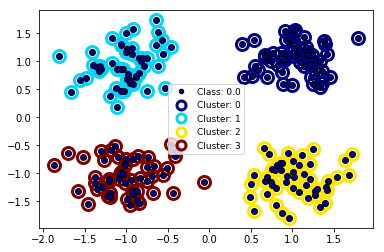

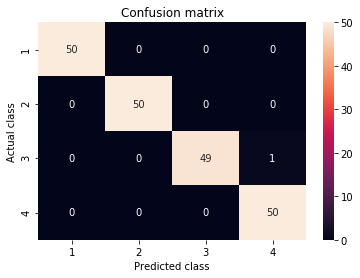

accuracy is 0.995, error rate is 0.005 for k=5 and p=2


SYNTH2


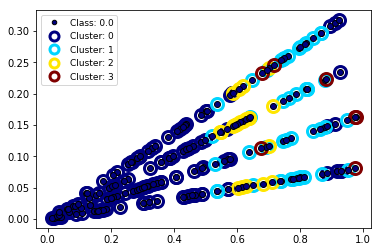

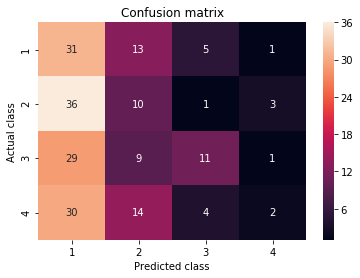

accuracy is 0.27, error rate is 0.73 for k=5 and p=999


SYNTH3


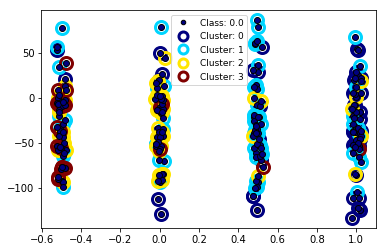

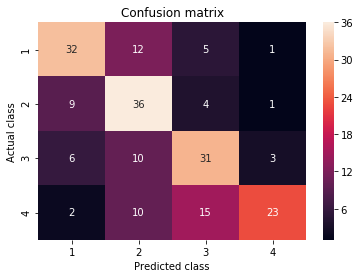

accuracy is 0.61, error rate is 0.39 for k=5 and p=1


SYNTH4


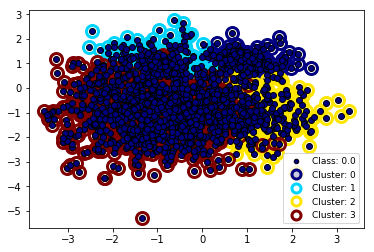

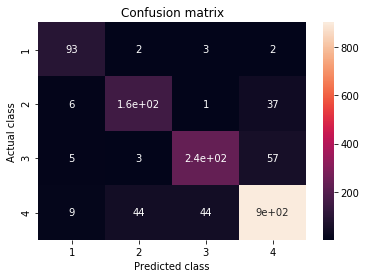

accuracy is 0.867, error rate is 0.133 for k=5 and p=2




In [4]:
print('SYNTH1')
assignment1(synth[0],5,2)

print('SYNTH2')
assignment1(synth[1],5,999)

print('SYNTH3')
assignment1(synth[2],5,1)

print('SYNTH4')
assignment1(synth[3],5,2)



For all sets we can achieve perfect accuracy if we set k to 1. This is explained by the fact that the datapoint that we are testing is also in the training set, and will have a perfect match with itself. There is furthermore a general trend of lower k leading to better accuracy. This might be different if we would split up the data into seperate training and test sets, because this would demand more robustness from the classifier to deal with the randomness of the split. Even though it seems like a sensible thing to do this split, i could not find this back in the assignment phrasing - therefore i did not split and tried to adhere to the literal assignment text. In order to still see how the distance measure affects things, i set k to 5 (no particular reason) for each dataset and here investigated the distance measure effect.


SYNTH1
The choice of neigbors and metric did not really matter that much here. The clusters are fairly well separated and we get high accuracies either way. Already if we turn neighbours down to 2 (for euclidean), we can achieve perfect accuracy.


SYNTH2
Cityblock performed very slightly better here. I'm not sure why. I would have expected euclidean to perform better as the clusters are spread out in a diagonal fashion.


SYNTH3
Cityblock performed better here. The data doesn't seem to be spread evenly across space. Rather, it seems that the x-axis divides the data more or less in 4 categories. This structure may make more sense to measure using cityblock. Although the visual categories might be artifacts of the fact that the axes have very different scaling.


SYNTH4
Euclidean performed better here. The data is more or less spread evenly in space, and this is where euclidean distance makes the most sense.


Where clusters are overlapping i would go with a large k. This should reduce the overfitting that we may experience if clusters are locally intermingled in a random way and we have a low k. It might also give us a bit more of a meaningful 'border' between the clusters, rather than a classification that is again overlapping, if that's something that could be useful to us.



#### 6.1.2 (1 points)
In general we can use cross-validation to select the optimal distance metric and
number of nearest neighbors k although this can be computationally expensive. We now return to the Iris data that we have considered in previous exercises, and will attempt to classify the Iris flowers using KNN. Load the Iris data into Python with the `pandas` function `read_excel()`. Inspect the data by printing the `head()`. Use the values of the 4 variables `Sepal Length,  Sepal Width,  Petal Length,  Petal Width` to create a data set `X`. Use the `Type` column to create the labels `y`. Use leave-one-out cross-validation to estimate the number of neighbors, k, for the k-nearest neighbor classifier. Plot the cross-validation average classification error as a function of k for $k = 1,..,40$.

You can use the function `LeaveOneOut` from `sklearn.model_selection`: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

What is the optimal number of neighbors to use for this data?

In [5]:
from sklearn.model_selection import LeaveOneOut

iris=pd.read_excel('Data/iris.xls')
print(iris.head())

X=iris.values[:,0:3]

y=np.array(iris['Type'])

y[np.where(y=='Iris-setosa')]=0
y[np.where(y=='Iris-versicolor')]=1
y[np.where(y=='Iris-virginica')]=2
y=y.astype('int')

   Sepal Length  Sepal Width  Petal Length  Petal Width         Type
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [6]:
loo = LeaveOneOut()
testacc=np.zeros((150,40))

for i in range(1,41):
    for n, kfold in enumerate(loo.split(X)):
        
        neigh = KNeighborsClassifier(n_neighbors=i)
        
        dtc2=neigh.fit(X[kfold[0]],y[kfold[0]])
        
        testacc[n,i-1]=dtc2.score(X[kfold[1]],y[kfold[1]])
        
meantestacc=np.mean(testacc,0)

In [7]:
print(np.argmax(meantestacc)+1)  # We do +1 because indexing starts at 0, and this is for k=1
print(meantestacc[np.argmax(meantestacc)])

11
0.96


We get the best performance (96% accuracy) when we set k at 11.

#### 6.1.3 (2 points)

KNN can also be used for regression by predicting the output of an observation
as the average of the output values of its nearest neighbors. Predict the alcohol content of wine in the `Wine` data with KNN, using the other 10 attributes as predictors (ie. 'nearest' is based on those 10 other attributes). Plot the mean squared error of the predictions compared to the actual alcohol content as a function of the number of nearest neighbors k for $k = 1,..,40$. What is the optimal value for the number of nearest neighbors?

Perform the regression on all observations; no need to do cross-validation here. 

*Hints: Use the `NearestNeighbors` class and the function `kneighbors()` to find the nearest neighbors -- check the doc and read what this function does.*
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

*Make a matrix `X` containing the first 10 attributes, and a vector `alcohol` containing the 11th attribute. Fit `X`, and get indices of the 41 nearest neighbors from the `kneigbors()` function. Use these indices to create an Nx41 matrix containing the alcohol values of the 40 closest neigbors for each of the N wines.*

*Predict each observation as the mean of the alcohol content of its k nearest neighbors. Make sure you don't include the value for the observation itself!*

In [8]:
from sklearn.neighbors import NearestNeighbors

wine=scipy.io.loadmat('Data/wine.mat')
X=np.array(wine['X'][:,0:10])
y=np.array(wine['X'][:,10])


MSE=np.zeros(40)

for k in range(1,41):
    k=k+1
    ypredicted=np.zeros(np.shape(y))
    
    wineKNN=NearestNeighbors(k)
    wineKNN.fit(X)
    neighbors=wineKNN.kneighbors(X,k, False)[:,1:] #I'm slicing to exclude the observation itself as a neighbor.
    
    for i in range(len(X)):
        ypredicted[i]=np.mean(y[neighbors[i]])
    
    MSE[k-2]=np.sum(np.power(y-ypredicted,2))
    

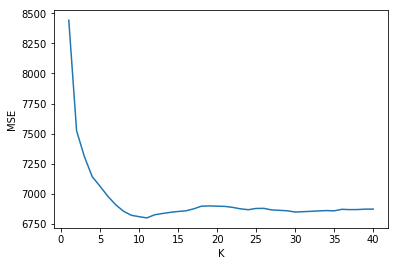

MSE as a function of K for the wine data KNN prediction


In [9]:
plt.plot(list(range(1,41)), MSE)
plt.ylabel('MSE')
plt.xlabel('K')

plt.show()

print('MSE as a function of K for the wine data KNN prediction')

In [10]:
print(np.argmin(MSE)+1) # We have to do +1 because of indexing from 0, not 1.

11


The optimal number of k appears to be 11.

## 6.2 Artificial Neural Networks

In this part of the exercise we will use neural networks to classify the xor data. We will consider a network with an input layer, one layer of hidden units and an output layer. The class `sklearn.neural_network.MLPClassifier` can be used to create a Multilayer Perceptron that can minimizes the Cross-Entropy loss function for any dataset X with corresponding labels y. See https://scikit-learn.org/stable/modules/neural_networks_supervised.html 

We use the data contained in `xor.mat` in the Data folder. 

#### 6.2.1 (0.5 points)
Check out the documentation for `MLPClassifier` and read the documentation well. Make sure you understand at least in general terms how the learning process works. Answer the following questions before you continue:

1. For a single perceptron, the activation function can be linear, e.g. $f(x) = x$. However, the activation function used in the MLP class is a non-linear function. Why does it not make sense for a MLP to use such a linear activation function? Hint: what does the following computation simplify to if $f(x)$ is such a simple linear function: $f(Wo*f(Wh*X_i))$?
2. The MLPClassifier has a few optional parameters. For each of the following parameters, explain how changing the parameter might affect the learning process or the resulting solution:

> `hidden_layer_sizes`:

> `max_iter`:

> `learning_rate`:

> `learning_rate_init`:

   3\. Use the following commands to create a small test set:

> `Xtest = np.array([[0,0],[0,1],[1,0],[1,1]]).`

> `ytest = np.array([0,0,0,1])`
     

Create a MLPClassifier with 1 hidden layer using the `lbfgs`solver and fit the data. You can leave the other parameters unchanged. Use the score method to compute the mean accuracy. How well does the MLP perform on this problem? Use the function `MLPPlot.plot_boundaries` function to plot the data and the decision boundaries. Why does(n't) it work well with one hidden unit? Could you improve by using more?

#### NB: the weights are initialised randomly, so you should run the code a few times untill you get a decent result.

1. The whole idea of MLP is to be able to represent nonlinear input-output relations. It does not make sense for the activation functions to be linear because then we would lose this property.

2. 
hidden_layer_sizes: 
Using too few neurons might result in underfitting, you are not able to represent the complexity of the data. Using more neurons might result in overfitting, as well as more data being needed to adequately train the network. The challenge is to find the right amount in the middle. Generally a good idea is to be somewhere in between input size and output size.

max_iter:
The total amount of training iterations you accept the network to run. If you set it very high, and the network does not converge, you are waiting for a loooong time. If you set it too low you might run the risk that you would have gotten a better fit if you had set it higher.

learning_rate:
A factor in the formula for updating neuron weights. If you set it too high, you might not be able to reach a minimum from gradient descent, because you keep skipping over the minimum. If you set it too low, you will have to wait for a loooong time for it to converge (or until it reaches max_iter).

learning_rate_init:
The initial value for your learning rate. effects similar to those for learning_rate, but used when you want to use an adaptive learning rate that might eg decrease on further iterations.


1.0


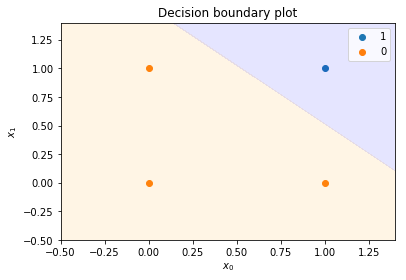

In [11]:
import Toolbox.MLPPlot 
from sklearn.neural_network import MLPClassifier


Xtest = np.array([[0,0],[0,1],[1,0],[1,1]])

ytest = np.array([0,0,0,1])

clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(1,))

clf.fit(Xtest,ytest)

print(clf.score(Xtest,ytest))


plotter = Toolbox.MLPPlot.MLPPlot(Xtest,ytest,clf)
plotter.plot_boundaries()


It doesnt work very well with only a single hidden node as it often classifies everything as 0. Adding hidden nodes improves performance, the network now has more freedom to find the right classes (although we might overfit).

#### 6.2.2 (0.5 points)
Load the data from `xor.mat` into Python using `scipio.io.loadmat(...)` and make `y` a 1d vector. Make a scatter plot of the two attributes in `X`, coloring the points according to the class labels `y`. How are `X` and `y` related?

In [12]:
xor=scipy.io.loadmat('Data/xor.mat')
X=xor['X']
y=np.array(xor['y'].ravel())
booly=np.array(xor['y'].ravel(), dtype=bool)

class1=xor['X'][~booly]
class2=xor['X'][booly]


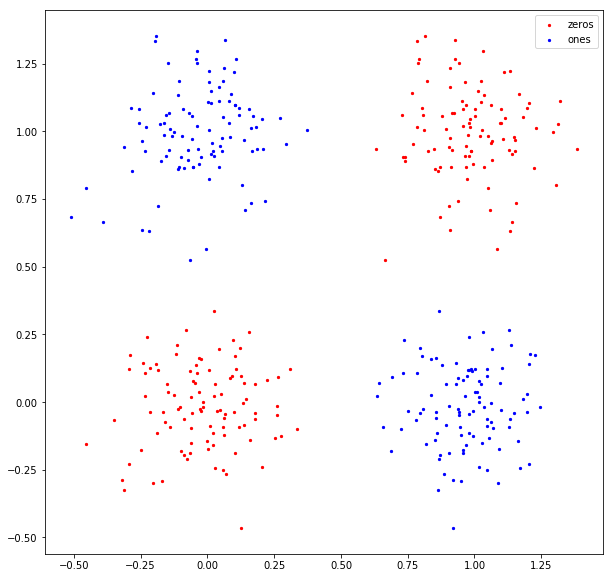

In [13]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

ax.scatter(class1[:,0],class1[:,1], s=5, c='red', label='zeros')
ax.scatter(class2[:,0],class1[:,1], s=5, c='blue', label='ones')
ax.legend()
plt.show()

There appear to be two cluster of each class, in a sort of checkerboard configuration. If we're talking about relations we would find a negative X,y correlation for the blue class and a positive X,y correlation for the red class.

#### 6.2.3 (2 points)
Create a MLPClassifier with 1 hidden unit. Fit X and y. Use 10-fold cross-validation `KFold` from `sklearn.model_selection` to create training and test sets and estimate the classification error for both. In each fold, run the learning process 5 times and take the best classification error.  

Plot the decision boundaries of one network trained on the entire data set, again with 1 hidden unit, and explain why the network performs so well/poorly.

In [14]:
from sklearn.model_selection import KFold

clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(1,))

K = 10
kf = KFold(n_splits=K)

toptrainscores=np.zeros(K)
toptestscores=np.zeros(K)

for n,kfold in enumerate(kf.split(X)):
    trainscores=np.zeros(5)
    testscores=np.zeros(5)
    for i in range(5):
        fit=clf.fit(X[kfold[0]],y[kfold[0]])
        trainscores[i]=fit.score(X[kfold[0]],y[kfold[0]])
        testscores[i]=fit.score(X[kfold[1]],y[kfold[1]])
    
    toptrainscores[n]= np.amax(trainscores) 
    toptestscores[n]=  np.amax(testscores) 
meantrain=np.mean(toptrainscores)
meantest=np.mean(toptestscores)

print('mean training score')
print(meantrain)
print('mean testing score')
print(meantest)

mean training score
0.7947222222222221
mean testing score
0.79



Ok i have been SO confused for about an hour as to why the mean accuracy in the train set was often higher than the test set! That can't be right, but i just couldnt find the mistake in the code... Then i realized that this is due to picking the best of 5 fits each Kfold, and because the test set has fewer datapoints than the train set (especially for high K), there is often a 'lucky' one where one of the clusters is not well represented and it can achieve a good fit. Mystery solved! Lesson learned! Cool stuff! 😁


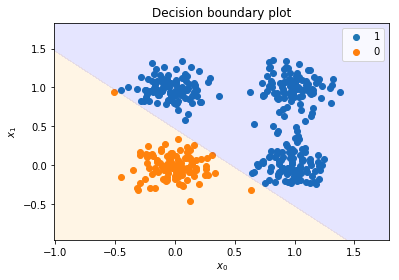

In [15]:
fit=clf.fit(X,y)

plotter = Toolbox.MLPPlot.MLPPlot(X,y,clf)
plotter.plot_boundaries()

On the full set, the network performs poorly. This is because with one hidden neuron, it can only use a hyperplane (line for 2d) as a divider. Because of the way the data is organised, this will not have great effects. Your maximum accuracy will be around 0.75, because you will always necessarly classify one of the clusters in the wrong way.


#### 6.2.4 
Repeat 6.2.3, but use two hidden units instead of one. Does the classification performance improve? Can you explain why?

mean training score
0.9922222222222222
mean testing score
0.99


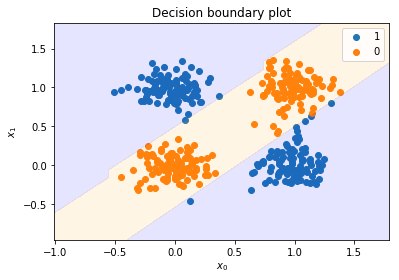

In [20]:
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(2,))

K = 10
kf = KFold(n_splits=K)

toptrainscores=np.zeros(K)
toptestscores=np.zeros(K)

for n,kfold in enumerate(kf.split(X)):
    trainscores=np.zeros(5)
    testscores=np.zeros(5)
    for i in range(5):
        fit=clf.fit(X[kfold[0]],y[kfold[0]])
        trainscores[i]=fit.score(X[kfold[0]],y[kfold[0]])
        testscores[i]=fit.score(X[kfold[1]],y[kfold[1]])
        
    toptrainscores[n]= np.amax(trainscores) 
    toptestscores[n]=  np.amax(testscores) 
meantrain=np.mean(toptrainscores)
meantest=np.mean(toptestscores)

print('mean training score')
print(meantrain)
print('mean testing score')
print(meantest)

fit=clf.fit(X,y)

plotter = Toolbox.MLPPlot.MLPPlot(X,y,clf)
plotter.plot_boundaries()

Yes, this does improve quality. The network is now no longer limited to fitting a single simple hyperplane, and can work its way 'around' the data points to achieve good separation. See example above.

#### 6.2.5
Repeat 6.2.3 with 10 hidden units. What happens to the decision boundaries of the learned neural networks? What are the benefits and drawbacks of including
many hidden units in the network?

mean training score
1.0
mean testing score
0.9974999999999999


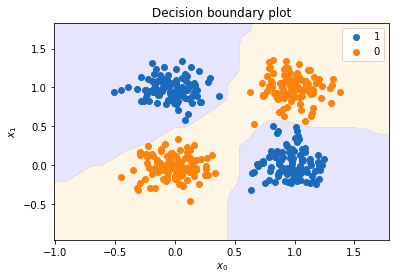

In [17]:
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,))

K = 10
kf = KFold(n_splits=K)

toptrainscores=np.zeros(K)
toptestscores=np.zeros(K)

for n,kfold in enumerate(kf.split(X)):
    trainscores=np.zeros(5)
    testscores=np.zeros(5)
    for i in range(5):
        fit=clf.fit(X[kfold[0]],y[kfold[0]])
        trainscores[i]=fit.score(X[kfold[0]],y[kfold[0]])
        testscores[i]=fit.score(X[kfold[1]],y[kfold[1]])
    
    toptrainscores[n]= np.amax(trainscores) 
    toptestscores[n]=  np.amax(testscores) 
meantrain=np.mean(toptrainscores)
meantest=np.mean(toptestscores)

print('mean training score')
print(meantrain)
print('mean testing score')
print(meantest)

fit=clf.fit(X,y)

plotter = Toolbox.MLPPlot.MLPPlot(X,y,clf)
plotter.plot_boundaries()

This is great, we're getting excellent scores. The decision lines are now very curved and irregular, but separate the data well. One drawback of this many hidden units can be overfitting the data (although it still worked well for the test sets here - or... at least one in every five times.) Another drawback can be that you might now require more data points to tune all the extra units to the right parameters. Third, more units can lead to more computational complexity - you will need a beefy computer or just a lot of patience.
